<a href="https://colab.research.google.com/github/SamiraAsadzadeh/HomeWork_DeepLearning/blob/main/A_Simple_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **By: Samira Asadzadeh  40116341054541**

*   **Advisor:  Dr. Mr.Asadi**

*  **ISLAMIC AZAD UNIVERSITY SHIRAZ BRANCH Faculty of engineering**



# **A Simple Neural Network**
-------------------------------------------------

In [61]:
from google.colab import drive

drive.mount('/content/drive')

#!ls 'drive/My Drive'

Mounted at /content/drive


In [54]:
from tensorflow import keras
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from IPython.display import Image
import numpy as np
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import *
from keras.layers import Dense
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
cifar10_class_names= {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck",
}

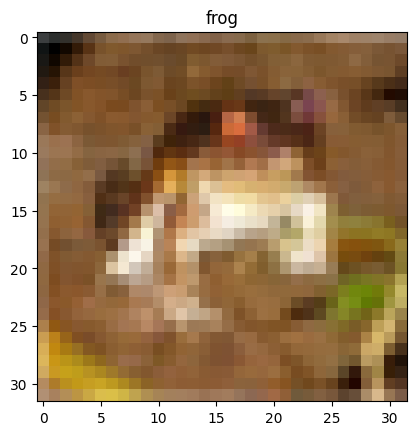

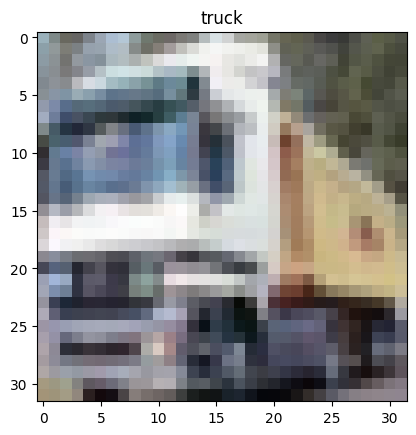

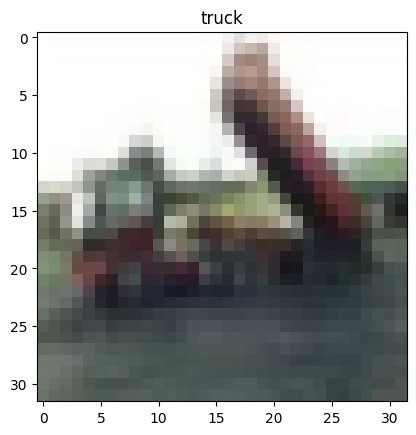

In [18]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

for i in range(3):
  sample_image = x_train[i]
  image_class_number = y_train[i][0]
  image_class_name = cifar10_class_names[image_class_number]

  plt.imshow(sample_image)
  plt.title(image_class_name)
  plt.show()


In [76]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train = x_train/255
x_test = x_test/255
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# *** neural network with 1  layers***

In [77]:
model = Sequential()
model.add(Dense(512, activation ="relu", input_shape = (32,32,3)))
model.add(Dense(10, activation ="softmax"))

model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 32, 32, 512)       2048      
                                                                 
 dense_17 (Dense)            (None, 32, 32, 10)        5130      
                                                                 
Total params: 7178 (28.04 KB)
Trainable params: 7178 (28.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# *** neural network with 2  layers***

In [47]:
model = Sequential()
model.add(Dense(512, activation ="relu", input_shape = (32,32,3)))
model.add(Dense(256, activation ="relu"))
model.add(Dense(10, activation ="softmax"))

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 32, 32, 512)       2048      
                                                                 
 dense_8 (Dense)             (None, 32, 32, 256)       131328    
                                                                 
 dense_9 (Dense)             (None, 32, 32, 10)        2570      
                                                                 
Total params: 135946 (531.04 KB)
Trainable params: 135946 (531.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# *** CNN***

In [55]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding = "same", activation = "relu", input_shape = (32,32,3)))
model.add(Conv2D(32, (3,3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation = "relu"))
model.add(Conv2D(64, (3,3), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation ="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation ="softmax"))

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_17 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_18 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 conv2d_19 (Conv2D)          (None, 13, 13, 64)        36928     
                                                     

In [56]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [66]:
model.fit(x_train, y_train, batch_size=32, epochs=30, validation_split=0.2, shuffle=True)

Epoch 1/30
1250/1250 [==============================] - 8s 7ms/step - loss: 0.3993 - accuracy: 0.8618 - val_loss: 0.1347 - val_accuracy: 0.9623
Epoch 2/30
1250/1250 [==============================] - 9s 7ms/step - loss: 0.3846 - accuracy: 0.8666 - val_loss: 0.1542 - val_accuracy: 0.9551
Epoch 3/30
1250/1250 [==============================] - 7s 6ms/step - loss: 0.3863 - accuracy: 0.8642 - val_loss: 0.1795 - val_accuracy: 0.9437
Epoch 4/30
1250/1250 [==============================] - 9s 7ms/step - loss: 0.3726 - accuracy: 0.8698 - val_loss: 0.1759 - val_accuracy: 0.9413
Epoch 5/30
1250/1250 [==============================] - 12s 10ms/step - loss: 0.3651 - accuracy: 0.8730 - val_loss: 0.1716 - val_accuracy: 0.9442
Epoch 6/30
1250/1250 [==============================] - 9s 7ms/step - loss: 0.3591 - accuracy: 0.8752 - val_loss: 0.2035 - val_accuracy: 0.9317
Epoch 7/30
1250/1250 [==============================] - 9s 7ms/step - loss: 0.3713 - accuracy: 0.8718 - val_loss: 0.2017 - val_accurac

In [67]:
#model.evaluate
loss_ , acc = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss_)
print('Test accuracy:', acc)

Test loss: 0.7383514046669006
Test accuracy: 0.7989000082015991


In [68]:
prediction = model.predict(x_test)
classes_x=np.argmax(prediction,axis=1)#این دستور خروجی پیش بینی شده را که به صورت یک آرایه هست را به یک عدد تبدیل می کند
print('Test prediction:', classes_x)

313/313 [==============================] - 1s 3ms/step
Test prediction: [3 8 8 ... 5 1 7]


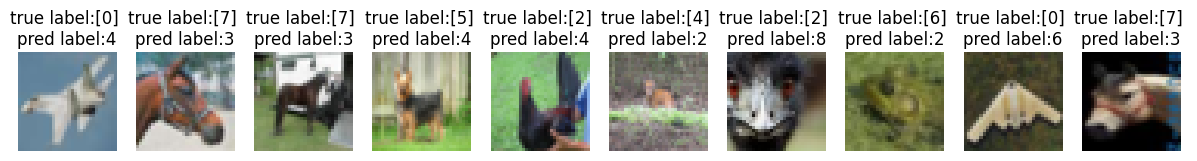

In [70]:
(_, _), (x_test_image, y_test_label) = cifar10.load_data()


b=0
f,axs = plt.subplots(1,10, figsize=(15, 15))

for t in range (len(y_test)):
  if b>=10:
    break
  if (classes_x[t] !=  y_test_label[t]):
    axs[b].imshow(x_test_image[t], cmap='gray')
    axs[b].set_title(f'true label:{y_test_label[t]} \n' f'pred label:{classes_x[t]}')
    axs[b].axis('off')

    b+=1
